In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv("books.csv")
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


We first conduct a missingness heatmap to investigate missing values of our datasets 

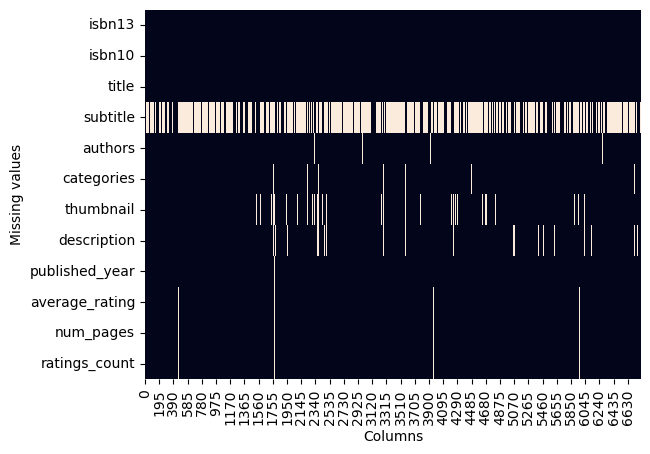

In [3]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)
plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

As we can see, subtitle is mostly missing, so we could leave that variable out. 

For other variables like authors, categories, thumbnail, description, the missing values are pretty random.

On the other hand, we can see a clear pattern for average rating, number of pages, and rating count - there are some entries that don't have all of these attributes. These are probably from another datasets, and maybe a potential source of bias, they might be newer/older, they might have different characteristics,... 

Since the recommender is based on the semantic description of the books, we need to investigate the potential bias when we remove books without description. We will look at the correlation matrix of books without description and the columns with clear null value pattern (3 last variables)

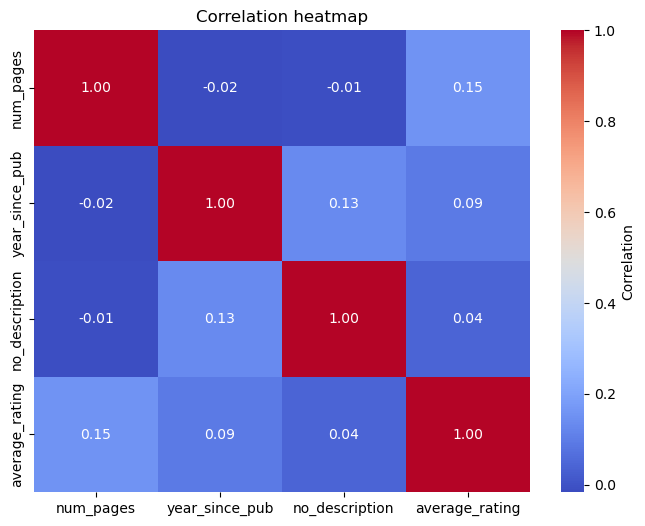

In [4]:
books["no_description"] = np.where(books.description.isna(),1,0)
books["year_since_pub"] = 2025 - books.published_year
relavent_columns=["num_pages", "year_since_pub","no_description","average_rating"]
corr_matrix = books[relavent_columns].corr(method='spearman')
plt.figure(figsize=(8,6))
heatmap=sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm",    
                    cbar_kws={"label": "Correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

As we can see, none the values between no_description and other variables are closer to 0, indicating a week correlation between the variables and no_description. Therefore, we can conclude pretty confidently that, in term of these dimensions, the book description is pretty representative. That is, we wouldn't introduce bias against longer/shorter books, or older/younger books, or better/worst rated books when we remove books without these params :)

What we can do is to retrieve the params for these books online, but if that is too much manual work (300+ books), we can (for now) remove these books from our database (less than 5% of the actual data). A task of retriving the descrption for these books can be left for future work, using asisstance from GPT or other GenAI tools :)

In [5]:
book_cleaned = books[~(books["description"].isna()) &
      ~(books["num_pages"].isna()) &
      ~(books["average_rating"].isna()) &
      ~(books["published_year"].isna())
]
book_cleaned

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,no_description,year_since_pub
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0


In [8]:
category_counts = book_cleaned["categories"].value_counts().reset_index()
category_counts.columns = ['category', 'count']  # Rename columns explicitly
category_counts = category_counts.sort_values("count", ascending=False)
category_counts

,category,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


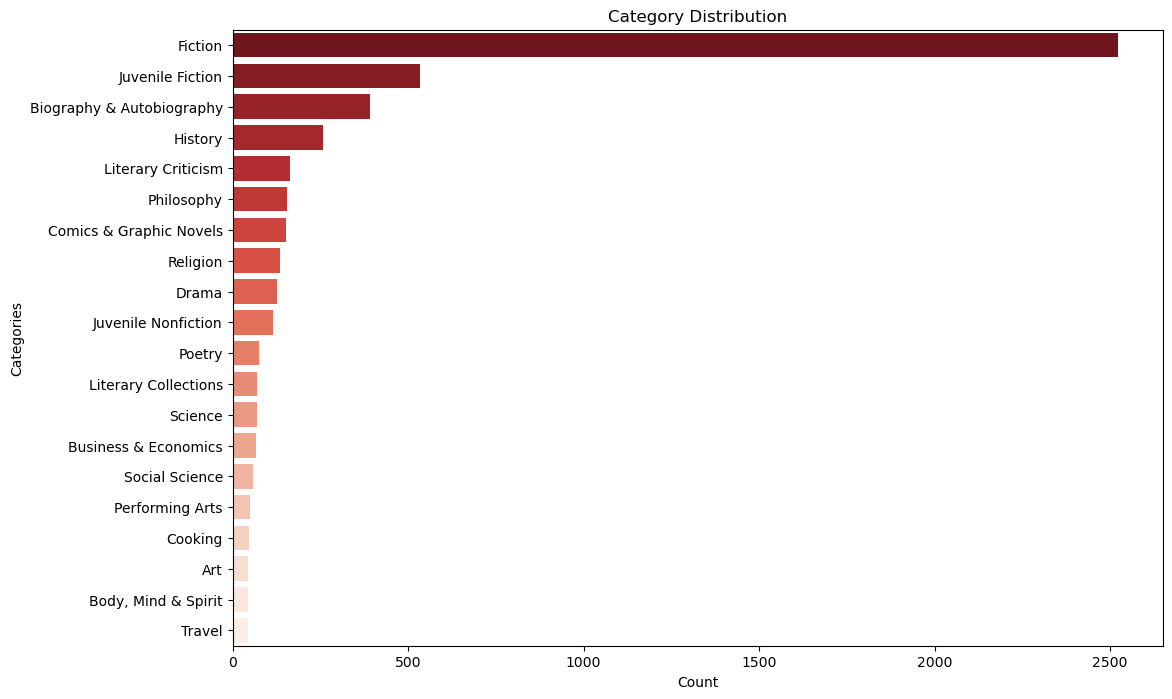

In [10]:
plt.figure(figsize=(12, 8))  # Adjust size
sns.barplot(y=category_counts["category"].head(20), x=category_counts["count"], palette="Reds_r")

# Labels and title
plt.xlabel("Count")
plt.ylabel("Categories")
plt.title("Category Distribution")
plt.show()


We can see that our data has a long tail problem with the categories. Most of the books belong to Fiction categories; however, there are a large amount of categories that contain only a few books or even a single book; for some, the categories don't even make sense/useful. 

An idea that we could use is to use LLMs to perform text classification to form reasonable categories. The way that we are going to do this is to use the book description. However, the description needs to be informative and meaningful enough to classify the book. Therefore, we need to screen the data and remove uninformative description. In our case, uninformative descriptions can be ones that are too short

In [23]:
book_cleaned["no_words"] = book_cleaned["description"].str.split().str.len()
book_cleaned

/var/folders/t8/4n76dcld0j3925qzvdm8vtlw0000gn/T/ipykernel_80389/2371170161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_cleaned["no_words"] = book_cleaned["description"].str.split().str.len()


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,no_description,year_since_pub,no_words
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0,245


Here we do some manual investigation by looking at different description length (for example from 1-10 to 10-20 ...) to see the lower cutoff. We arrived at the conclusion that descriptions are generally meaningful when they contain at least 25 words. Therefore, we filter short description of less than 25 words. 

In [25]:
book_desc = book_cleaned[book_cleaned["no_words"] >= 25]

In [26]:
book_desc["title_and_subtitle"] = (
    np.where(book_desc["subtitle"].isna(), book_desc["title"],
             book_desc[["title", "subtitle"]].astype(str).agg(": ".join, axis=1))
)
book_desc["tagged_description"] = book_desc[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)

/var/folders/t8/4n76dcld0j3925qzvdm8vtlw0000gn/T/ipykernel_80389/3078562040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_desc["title_and_subtitle"] = (


In [28]:
book_desc.drop(["subtitle", "no_description", "year_since_pub", "no_words"], axis=1).to_csv("books_cleaned.csv", index = False)